# k-NN Classifier - Yeast Dataset

In [15]:
# Import libraries
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib

# Import project modules
from src.data_loader import load_processed_data
from src.config import *

print("🔍 k-NN Classifier Analysis")
print("=" * 30)

🔍 k-NN Classifier Analysis


In [16]:
# Load the processed data
print("1. Loading processed data...")
X_train, X_test, y_train, y_test = load_processed_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Load class names
label_encoder = np.load(MODELS_DIR / 'label_encoder.npy', allow_pickle=True)
class_names = label_encoder
print(f"Class names: {class_names}")

1. Loading processed data...
Training data shape: (1038, 8)
Test data shape: (446, 8)
Number of classes: 10
Class names: ['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']


In [17]:
# Load the trained k-NN model
print("2. Loading trained k-NN model...")
model = joblib.load(MODELS_DIR / 'knn.pkl')

print(f"Model type: {type(model)}")
print(f"Number of neighbors: {model.n_neighbors}")
print(f"Weights: {model.weights}")
print(f"Metric: {model.metric}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"Predictions shape: {y_pred.shape}")
print(f"Prediction probabilities shape: {y_pred_proba.shape}")

2. Loading trained k-NN model...
Model type: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Number of neighbors: 15
Weights: distance
Metric: euclidean
Predictions shape: (446,)
Prediction probabilities shape: (446, 10)


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [18]:
# Model Performance Analysis
print("3. Model Performance Analysis")
print("=" * 30)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

3. Model Performance Analysis
Accuracy: 0.6121
Precision: 0.6055
Recall: 0.6121
F1-Score: 0.6002

Detailed Classification Report:
              precision    recall  f1-score   support

         CYT       0.54      0.73      0.62       139
         ERL       1.00      1.00      1.00         2
         EXC       0.64      0.64      0.64        11
         ME1       0.71      0.92      0.80        13
         ME2       0.33      0.20      0.25        15
         ME3       0.80      0.82      0.81        49
         MIT       0.64      0.56      0.60        73
         NUC       0.63      0.50      0.56       129
         POX       0.75      0.50      0.60         6
         VAC       0.00      0.00      0.00         9

    accuracy                           0.61       446
   macro avg       0.60      0.59      0.59       446
weighted avg       0.61      0.61      0.60       446



/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13

4. Confusion Matrix


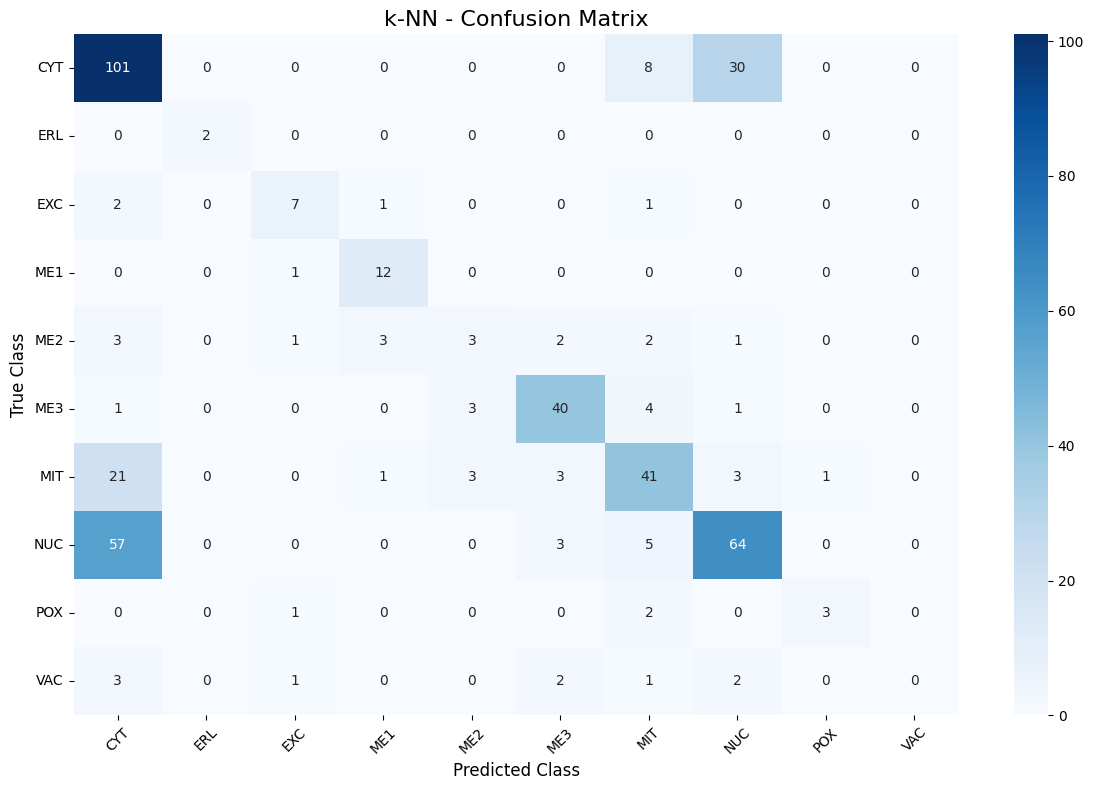


Per-class Accuracy:
CYT: 0.727
ERL: 1.000
EXC: 0.636
ME1: 0.923
ME2: 0.200
ME3: 0.816
MIT: 0.562
NUC: 0.496
POX: 0.500
VAC: 0.000


In [19]:
# Confusion Matrix Visualization
print("4. Confusion Matrix")
print("=" * 20)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('k-NN - Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for i, (class_name, acc) in enumerate(zip(class_names, class_accuracy)):
    print(f"{class_name}: {acc:.3f}")

5. Distance Analysis
Distances to k nearest neighbors for first 5 test samples:

Sample 1:
  Distances: [0.53130268 0.5755298  0.66813589 0.67161967 0.67265678 0.69813438
 0.70834285 0.71109113 0.72270161 0.72901594 0.75217687 0.75817093
 0.75952916 0.76054895 0.77356139]
  Neighbor classes: 401    7
3      7
1      7
885    0
975    8
332    6
130    0
493    0
893    0
358    0
538    0
990    7
479    7
812    7
276    8
Name: 0, dtype: int64
  Predicted class: NUC

Sample 2:
  Distances: [1.31080651 1.33055403 1.33055403 1.40303349 1.47412965 1.50287183
 1.50287183 1.5251388  1.5434378  1.56905276 1.59506246 1.62631884
 1.64250182 1.67662625 1.73124477]
  Neighbor classes: 906    6
795    0
847    0
984    7
768    0
581    0
481    0
336    0
650    0
960    7
981    7
733    0
324    0
739    0
159    7
Name: 0, dtype: int64
  Predicted class: CYT

Sample 3:
  Distances: [1.05311767 1.26964126 1.36679807 1.37341014 1.47570519 1.47770054
 1.53192783 1.5707878  1.58313865 1.6280178

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


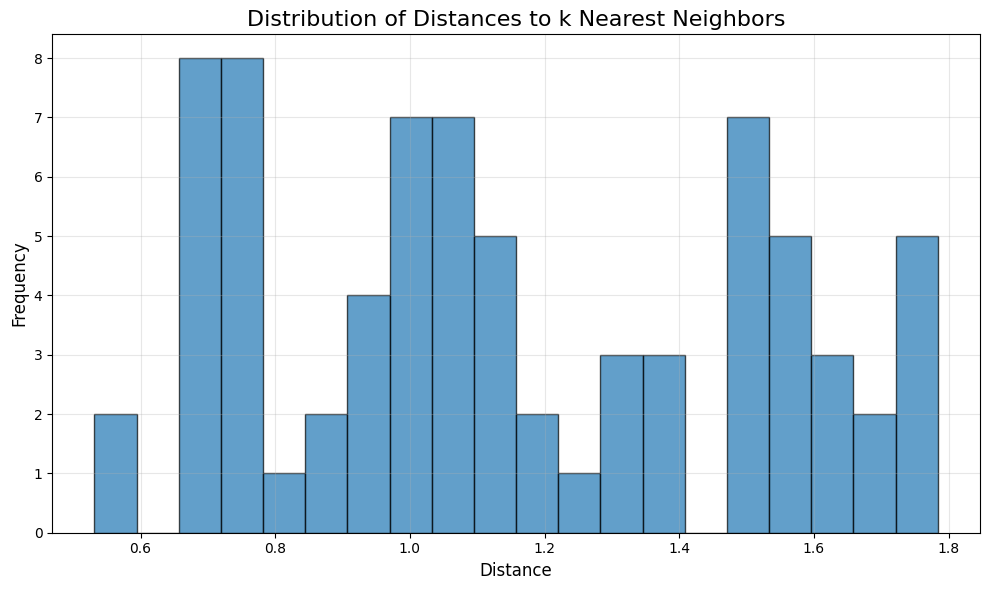

In [20]:
# Distance Analysis
print("5. Distance Analysis")
print("=" * 25)

# Get distances to nearest neighbors for first few test samples
distances, indices = model.kneighbors(X_test[:5])

print("Distances to k nearest neighbors for first 5 test samples:")
for i in range(5):
    print(f"\nSample {i+1}:")
    print(f"  Distances: {distances[i]}")
    print(f"  Neighbor classes: {y_train[indices[i]]}")
    print(f"  Predicted class: {class_names[y_pred[i]]}")

# Plot distance distribution
plt.figure(figsize=(10, 6))
plt.hist(distances.flatten(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Distances to k Nearest Neighbors', fontsize=16)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

6. Learning Curves Analysis


/opt/homebrew/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


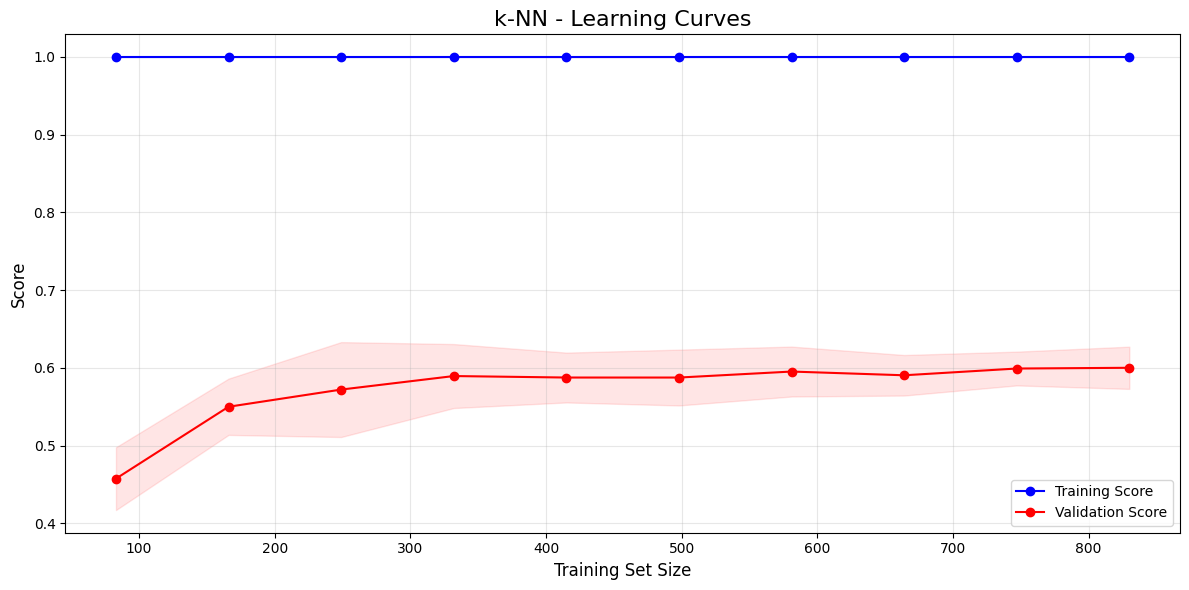

Final training score: 1.0000 ± 0.0000
Final validation score: 0.6002 ± 0.0272


In [21]:
# Learning Curves
print("6. Learning Curves Analysis")
print("=" * 30)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('k-NN - Learning Curves', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training score: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Final validation score: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")